In [26]:
# lab 1  : se
import random as r
import math as m
def monte_carlo_pi_seq():
    # Number of darts that land inside.
    inside = 0
    # Total number of darts to throw.
    total = 1000
    # Iterate for the number of darts.
    for i in range(0, total):
        # Generate random x, y in [0, 1]
        x2 = r.random()**2
        y2 = r.random()**2
        # Increment if inside unit circle.
        if m.sqrt(x2 + y2) < 1.0:
            inside += 1

    # inside / total = pi / 4
    pi = (float(inside) / total) * 4

    # It works!
    print(pi)
if __name__ =="__main__":
    monte_carlo_pi_seq()

3.128


In [6]:
# parallel 
import random
import multiprocessing
from multiprocessing import Pool
def monte_carlo_pi_part(n):
    count = 0
    for x in n:
        for i in range(x):
            x=random.random()
            y=random.random()

            # if it is within the unit circle
            if x*x + y*y <= 1:
                count=count+1
    return count
if __name__=='__main__':
    np = multiprocessing.cpu_count()
    print 'You have {0:1d} CPUs'.format(np)
    # Nummber of points to use for the Pi estimation
    n = 10000000
    part_count=[n/np for i in range(np)]

    count =monte_carlo_pi_part(part_count)

    print "Esitmated value of Pi:: ", count/(n*1.0)*4     

You have 4 CPUs
Esitmated value of Pi::  3.141608


In [27]:
#sorting 

Array = input("enter an array of elements : ")
low = 0
up = len(Array) - 1
def partition(Array,low,up):
    i = low+1
    j = up
    pivot = Array[low]
    while(i<=j):
        while(Array[i]<pivot and i<up):
            i = i+1
        while(Array[j]>pivot):
            j = j-1
        if(i<j):
            Array[i],Array[j] = Array[j],Array[i]
            i = i+1
            j = j-1
        else:
            i = i+1
    Array[low] = Array[j]
    Array[j] = pivot
    return j
 
def quick(Array,low,up):
    if(low>=up):
        return
    piv_loc = partition(Array,low,up)
    quick(Array,low,piv_loc-1)
    quick(Array,piv_loc+1,up)

def main():
    quick(Array,low,up)

    for i in Array:
        print i,
if __name__ == "__main__":
    main()

enter an array of elements : [5,2,8,1,8,3]
1 2 3 5 8 8


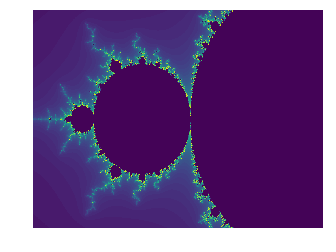

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def mandelbrot_set(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    w,h = width, height
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)
    for x in range(w): 
        for y in range(h):
            zx = 1.5*(x + x_off - 3*w/4)/(0.5*zoom*w)
            zy = 1.0*(y + y_off - h/2)/(0.5*zoom*h)
            
            z = complex(zx, zy)
            c = complex(0, 0)
            
            for i in range(niter):
                c = c**2 + z

            color = (i << 21) + (i << 10)  + i * 8
            pixels[y,x] = color
  
    return pixels

def display(width=1024, height=768, zoom=1.0, x_off=0, y_off=0, cmap='viridis'):
    pixels = mandelbrot_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off)
    plt.axis('off')
     plt.imshow(pixels, cmap=cmap)
    plt.show()
display(zoom=2.0, x_off=-300)

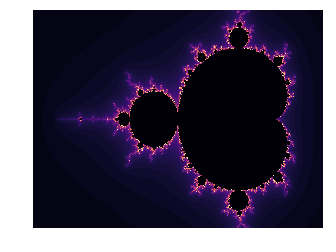

In [29]:
display(cmap='magma')

In [41]:
# lab2 :  parallel sum method

def sum_parallel(list , start=0,stop=None):
    if(start == stop):
        return list[start]
    elif(stop ==  start+1):
        return list[start]+list[stop]
    mid = (start +stop)/2
    return para_sum(list,start,mid) +para_sum(list,mid+1,stop)
def main():
    a = input("enter list of elements : ")
    print "sum of elements :" ,para_sum(a,0,len(a)-1)
if __name__ == "__main__":
    main()

enter list of elements : [2,6,2,8,3,0,2]
sum of elements : 23
23
